In [1]:
import pandas as pd

In [2]:
pd.__version__

'2.2.3'

In [3]:
import numpy as np

In [4]:
np.__version__

'2.1.2'

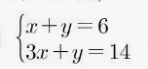

In [7]:
a = np.array([[1,1],[3,1]])

In [13]:
b = np.array([6,14])

In [14]:
np.dot(a,b)

array([20, 32])

In [10]:
b.shape

(2,)

In [16]:
np.dot(np.linalg.inv(a), a)

array([[1.00000000e+00, 1.11022302e-16],
       [1.11022302e-16, 1.00000000e+00]])

In [18]:
np.dot( a,np.linalg.inv(a))

array([[1.00000000e+00, 1.11022302e-16],
       [2.22044605e-16, 1.00000000e+00]])

In [17]:
np.linalg.inv(a)

array([[-0.5,  0.5],
       [ 1.5, -0.5]])

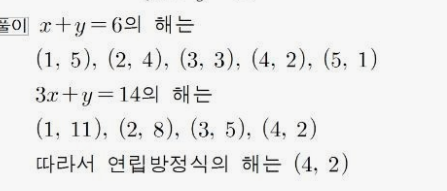

In [19]:
np.dot(np.linalg.inv(a),b)

array([4., 2.])

In [20]:
import sqlalchemy
from urllib import parse

user = 'encore'
password = '123'
host='127.0.0.1'
port = 3306
database = 'encore'
password = parse.quote_plus(password)
engine = sqlalchemy.create_engine(f"mysql://{user}:{password}@{host}:{port}/{database}")

In [21]:
import requests 
head = {'user-agent':
'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36'}
url = "https://finance.naver.com/item/sise_day.naver?code=005930&page={}"
df = pd.concat([pd.read_html(requests.get(url.format(x), headers=head).text)[0].dropna()   for x in range(1,11)])

In [44]:
df = df.iloc[::-1]

In [51]:
df['ma5'] = df['종가'].rolling(5).mean()

/tmp/ipykernel_5006/1628489303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma5'] = df['종가'].rolling(5).mean()


In [52]:
df.dropna()

,날짜,종가,전일비,시가,고가,저가,거래량,ma30,ma5
9,2024.06.14,79600.0,"상승 1,000",79700.0,80500.0,79000.0,22926612.0,77120.0,77120.0
5,2024.06.17,78100.0,"하락 1,500",79200.0,79500.0,78000.0,16123051.0,77600.0,77600.0
4,2024.06.18,79800.0,"상승 1,700",78700.0,80200.0,78600.0,18207598.0,78520.0,78520.0
3,2024.06.19,81200.0,"상승 1,400",81100.0,82500.0,80500.0,24168863.0,79460.0,79460.0
2,2024.06.20,81600.0,상승 400,81500.0,82200.0,81200.0,20288913.0,80060.0,80060.0
...,...,...,...,...,...,...,...,...,...
5,2024.10.30,59100.0,하락 500,59100.0,59800.0,58600.0,19838511.0,57860.0,57860.0
4,2024.10.31,59200.0,상승 100,58500.0,61200.0,58300.0,35809196.0,58380.0,58380.0
3,2024.11.01,58300.0,하락 900,59000.0,59600.0,58100.0,19083180.0,58860.0,58860.0
2,2024.11.04,58700.0,상승 400,58600.0,59400.0,58400.0,15586947.0,58980.0,58980.0


In [55]:
kbo = pd.read_sql_query("select * from kbo", con=engine)

In [60]:
kbo.shape

(916, 14)

In [67]:
kbo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   916 non-null    int64 
 1   선수명     916 non-null    object
 2   등번호     916 non-null    object
 3   생년월일    916 non-null    object
 4   포지션     916 non-null    object
 5   신장/체중   916 non-null    object
 6   경력      916 non-null    object
 7   입단 계약금  916 non-null    object
 8   연봉      916 non-null    object
 9   지명순위    916 non-null    object
 10  입단년도    916 non-null    object
 11  team    916 non-null    object
 12  신장      916 non-null    object
 13  체중      916 non-null    object
dtypes: int64(1), object(13)
memory usage: 100.3+ KB


In [74]:
kbo.isnull().sum()

index     0
선수명       0
등번호       0
생년월일      0
포지션       0
신장/체중     0
경력        0
입단 계약금    0
연봉        0
지명순위      0
입단년도      0
team      0
신장        0
체중        0
dtype: int64

In [79]:
kbo.loc[ 0:3 , "등번호":"포지션" ] 

,등번호,생년월일,포지션
0,No.034,2000년 11월 23일,투수(우투우타)
1,No.038,2005년 02월 10일,내야수(우투우타)
2,No.36,1998년 04월 07일,투수(우투우타)
3,No.,1999년 04월 16일,내야수(우투우타)


In [81]:
kbo.iloc[ 0:3  , 2: 5]

,등번호,생년월일,포지션
0,No.034,2000년 11월 23일,투수(우투우타)
1,No.038,2005년 02월 10일,내야수(우투우타)
2,No.36,1998년 04월 07일,투수(우투우타)


In [84]:
kbo['등번호'] == 'No.034'

0       True
1      False
2      False
3      False
4      False
       ...  
911    False
912    False
913    False
914    False
915    False
Name: 등번호, Length: 916, dtype: bool

In [88]:
kbo.loc[kbo['등번호'] == 'No.034', '신장/체중']

0    185cm/98kg
Name: 신장/체중, dtype: object

In [101]:
kia = kbo[kbo['team'] == 'KIA 타이거즈'].copy()

In [93]:
a = pd.DataFrame([1,2,3,4])

In [95]:
b = a

In [99]:
a.iloc[3] = 999

In [102]:
c = b.copy()

In [103]:
id(a)

140016016490992

In [104]:
id(b)

140016016490992

In [105]:
id(c)

140016016530672

In [106]:
c.iloc[0]= 999999999999

In [109]:
b

,0
0,1
1,2
2,3
3,999


In [115]:
kia['신장'].values

array(['185', '181', '190', '178', '184', '185', '187', '183', '183',
       '184', '187', '183', '188', '183', '177', '186', '188', '182',
       '182', '187', '165', '180', '182', '187', '176', '184', '182',
       '180', '185', '178', '183', '193', '190', '193', '184', '178',
       '180', '175', '181', '178', '185', '176', '180', '188', '190',
       '183', '191', '183', '172', '187', '186', '185', '184', '189',
       '181', '187', '180', '188', '182', '183', '187', '182', '184',
       '182', '185', '184', '177', '173', '181', '184', '180', '182',
       '178', '180', '181', '182', '189', '185', '192', '182', '176',
       '178', '178', '185', '184', '180', '185', '174', '184', '195',
       '178', '178', '183'], dtype=object)

In [117]:
kia[['신장', '체중']] = kia[['신장', '체중']].astype(int)

In [120]:
kia.describe()

,index,신장,체중
count,93.000000,93.000000,93.000000
mean,46.000000,182.849462,88.645161
std,26.990739,4.909942,8.488669
min,0.000000,165.000000,68.000000
25%,23.000000,180.000000,84.000000
50%,46.000000,183.000000,87.000000
75%,69.000000,185.000000,95.000000
max,92.000000,195.000000,108.000000


In [124]:
import matplotlib.pyplot as plt

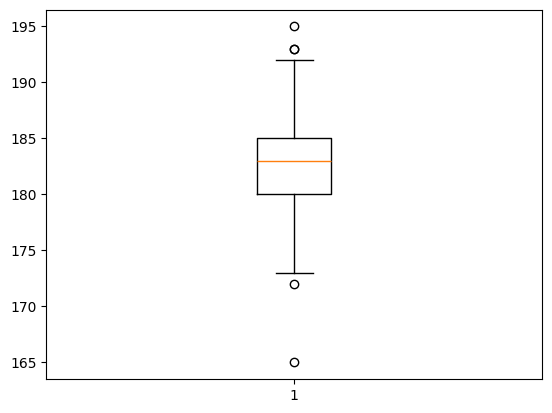

In [125]:
plt.boxplot(kia['신장'])
plt.show()

In [149]:
True & True
# and -> & 
# 

True

In [155]:
kbo  = kbo[~kbo['신장/체중'].apply(lambda x : len(x) < 9)].copy()

In [158]:
kbo['신장'] = kbo['신장/체중'].apply(lambda x : int(x.split("/")[0].replace("cm", " ")))

In [161]:
import re

p = re.compile("[0-9]+")

In [189]:
kbo['신장/체중'].apply(lambda x : p.findall(x.split("/")[0]))

0      [185]
1      [181]
2      [190]
3      [178]
4      [184]
       ...  
911    [180]
912    [177]
913    [183]
914    [192]
915    [187]
Name: 신장/체중, Length: 913, dtype: object

In [201]:
kbo['신장'] = kbo['신장/체중'].apply(lambda x : list(map(int,p.findall(x) ))[0])

In [203]:
kbo['체중'] = kbo['신장/체중'].apply(lambda x : list(map(int,p.findall(x) ))[1])

In [204]:
kbo.describe()

,index,신장,체중
count,913.000000,913.000000,913.000000
mean,457.608981,182.726177,87.491785
std,264.528261,4.990291,8.985990
min,0.000000,163.000000,62.000000
25%,229.000000,180.000000,82.000000
50%,458.000000,183.000000,87.000000
75%,686.000000,186.000000,93.000000
max,915.000000,203.000000,123.000000


In [207]:
kbo.drop("index", axis=1, inplace=True)

In [212]:
kbo.drop(['신장/체중'], axis=1,inplace=True)

In [217]:
kbo[['신장', '체중']].corr()

,신장,체중
신장,1.000000,0.541585
체중,0.541585,1.000000


In [222]:
kbo['BMI'] = kbo['체중']  / (kbo['신장']  / 100)**2

In [226]:
kbo.sort_values(by=['BMI'], ascending=False)

,선수명,등번호,생년월일,포지션,경력,입단 계약금,연봉,지명순위,입단년도,team,신장,체중,BMI
650,김민우,No.53,1995년 07월 25일,투수(우투우타),사파초-마산중-용마고,20000만원,16700만원,15 한화 2차 1라운드 1순위,15한화,한화 이글스,186,123,35.553243
191,김범석,No.55,2004년 05월 21일,포수(우투우타),김해삼성초-경남중-경남고,25000만원,3300만원,23 LG 1라운드 7순위,23LG,LG 트윈스,178,110,34.717839
671,박성웅,No.63,1999년 08월 20일,투수(좌투좌타),광주서석초-충장중-광주제일고,10000만원,3300만원,18 한화 2차 2라운드 14순위,18한화,한화 이글스,178,109,34.402222
699,이성원,No.,1999년 11월 02일,내야수(우투우타),수원신곡초-매향중-장안고-한화,6000만원,3000만원,18 한화 2차 6라운드 54순위,,한화 이글스,185,115,33.601169
278,김기연,No.45,1997년 09월 07일,포수(우투우타),광주수창초-진흥중-진흥고-LG,7000만원,4000만원,16 LG 2차 4라운드 34순위,17LG,두산 베어스,178,106,33.455372
...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,성지훈,No.97,2000년 01월 29일,투수(좌투좌타),송정동초-무등중-광주제일고-동아대,,3000만원,23 한화 육성선수,24한화,한화 이글스,181,68,20.756387
415,엄상백,No.18,1996년 10월 04일,투수(우언우타),역삼초-언북중-덕수고-KT-상무,23000만원,25000만원,15 KT 1차,15KT,KT 위즈,187,72,20.589665
435,이태규,No.45,2000년 02월 21일,투수(우투좌타),희망대초-매향중-장안고-KIA,8000만원,3000만원,19 KIA 2차 3라운드 30순위,23KIA,KT 위즈,188,72,20.371209
220,백선기,No.114,1998년 08월 27일,투수(좌투좌타),남도초-경상중-대구상원고-KT,5000만원,3000만원,18 KT 2차 7라운드 61순위,,LG 트윈스,186,70,20.233553


In [230]:
kbo.포지션.unique()

array(['투수(우투우타)', '내야수(우투우타)', '외야수(우투좌타)', '투수(좌투좌타)', '포수(우투우타)',
       '내야수(우투좌타)', '외야수(좌투좌타)', '투수(우언우타)', '외야수(우투우타)', '투수(좌투우타)',
       '내야수(좌투좌타)', '투수(우투양타)', '포수(우투좌타)', '투수(우투좌타)', '외야수(우투양타)',
       '투수(우언좌타)', '내야수(우투양타)', '외야수(좌투우타)', '포수(우투양타)'], dtype=object)

In [241]:
kbo.groupby(['team','포지션'])[['선수명']].count().reset_index().to_csv("./kbo_1.csv", index=False,
                                                                   encoding='utf-8-sig')

In [243]:
kbo.to_sql("kbo", if_exists='replace', con=engine)

913